In [1]:
# Prediction on a sex based on other features
# Purpose is to design NN

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train_EY.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

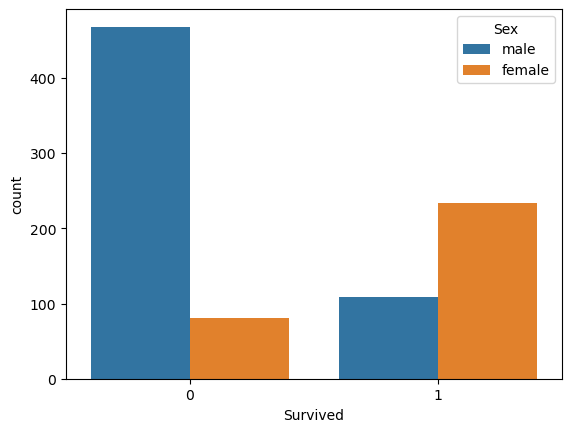

In [8]:
sns.countplot(x = df['Survived'], hue = df["Sex"])

Text(0.5, 1.0, 'Sex distribution')

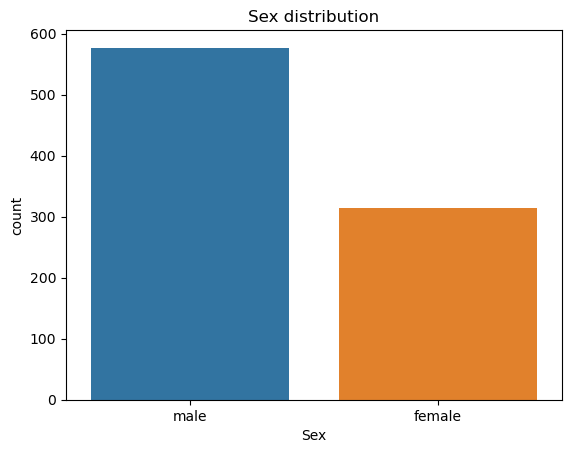

In [9]:
sns.countplot(x = df['Sex']).set_title('Sex distribution')

Text(0.5, 1.0, 'Pclass count by Sex')

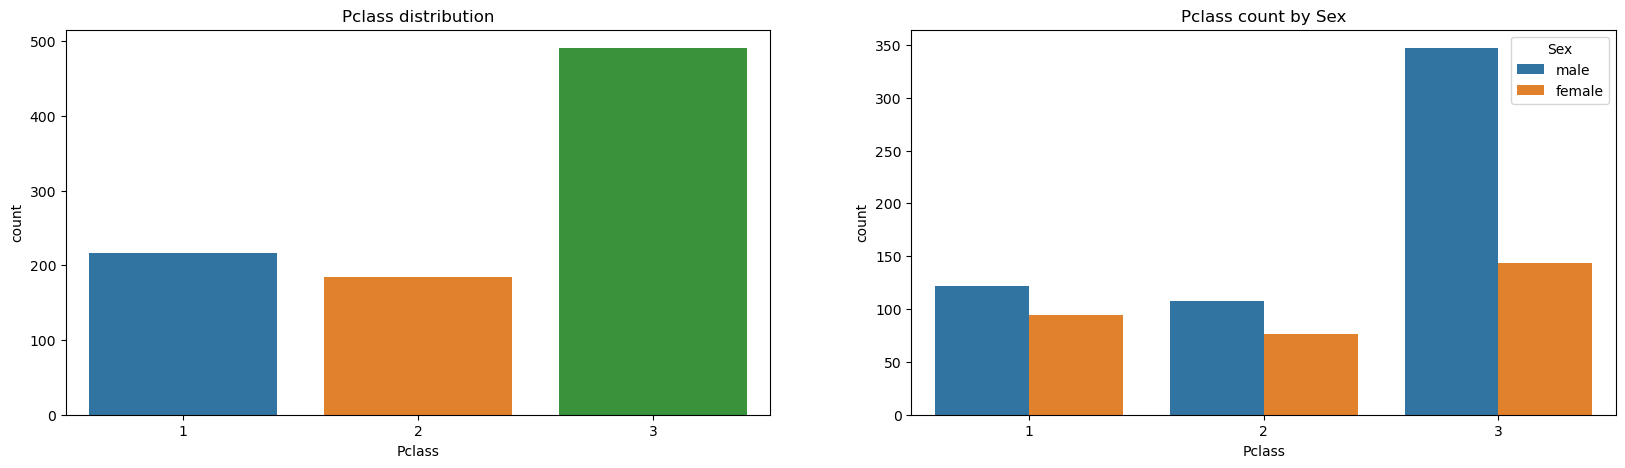

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(ax = axes[0], x = df['Pclass']).set_title('Pclass distribution')
sns.countplot(ax = axes[1], data = df, x = 'Pclass', hue = 'Sex').set_title('Pclass count by Sex')

Text(0.5, 1.0, 'Age distribution by Sex and Pclass')

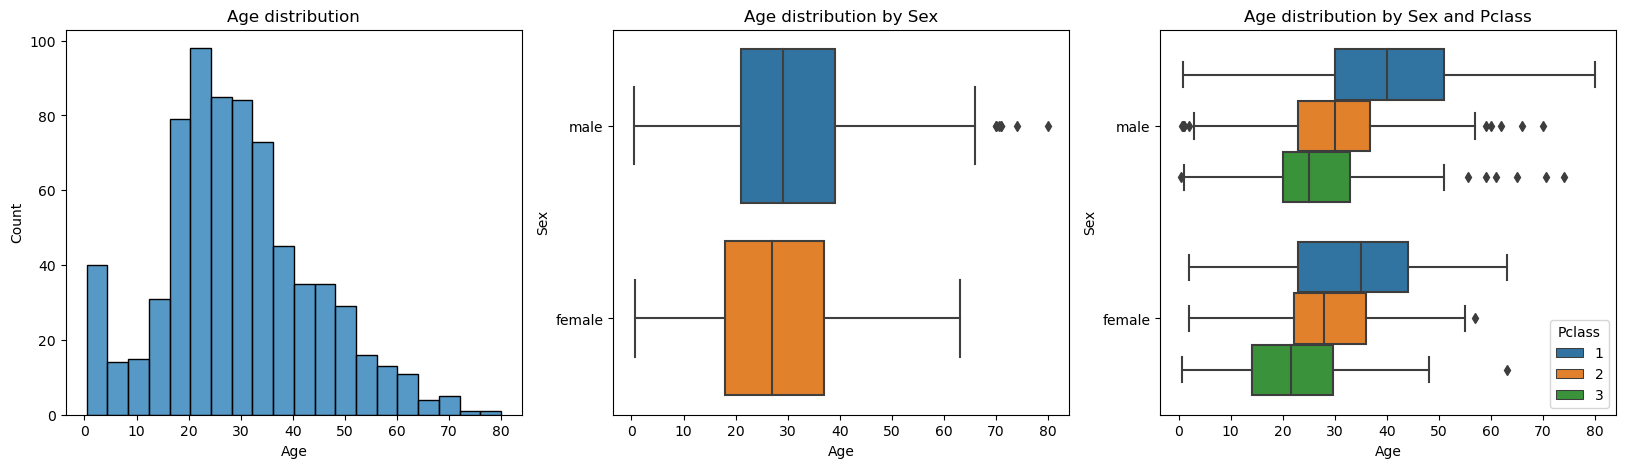

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(ax = axes[0], data=df, x="Age").set_title('Age distribution')
sns.boxplot(ax = axes[1], data=df, x="Age", y="Sex").set_title('Age distribution by Sex')
sns.boxplot(ax = axes[2], data = df, x = "Age", y = "Sex", hue = "Pclass").set_title("Age distribution by Sex and Pclass")

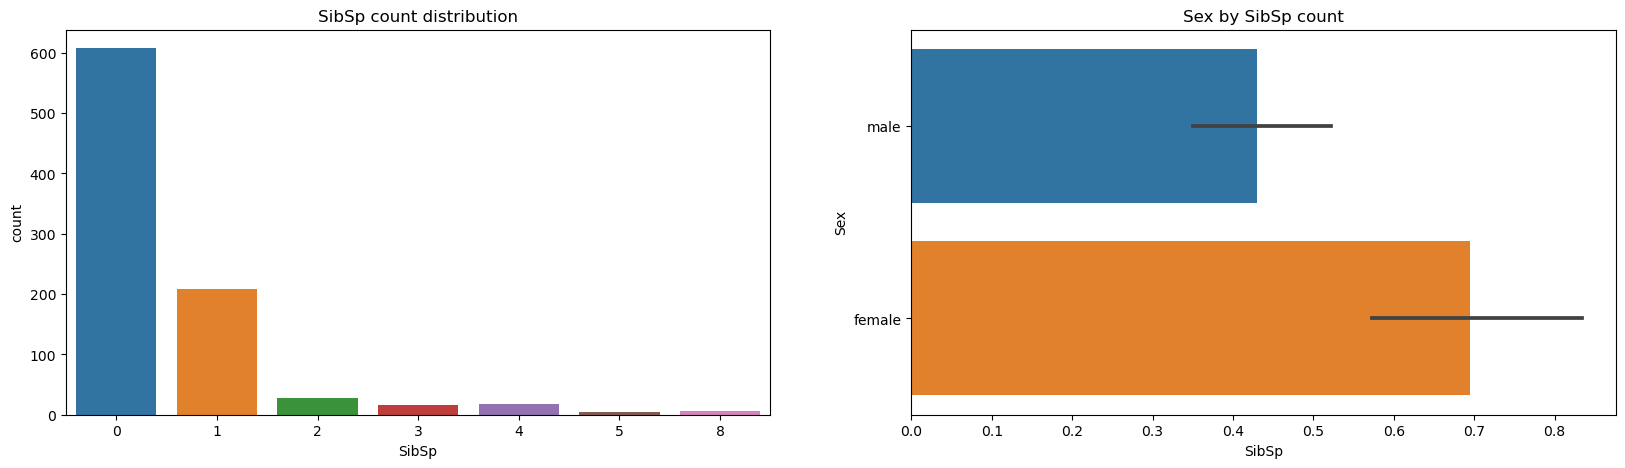

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(ax = axes[0], x = df['SibSp']).set_title('SibSp count distribution')
sns.barplot(ax = axes[1], data = df, x = "SibSp", y = "Sex").set_title('Sex by SibSp count');

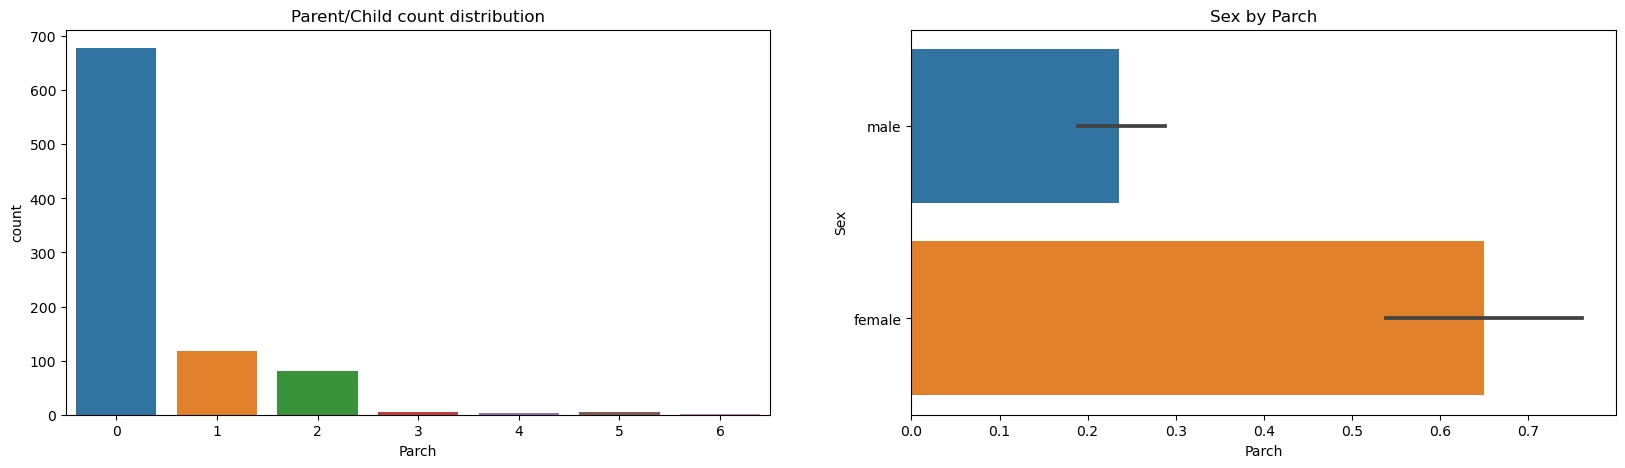

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(ax = axes[0], x = df['Parch']).set_title('Parent/Child count distribution')
sns.barplot(ax = axes[1], data = df, x = "Parch", y = "Sex").set_title('Sex by Parch');

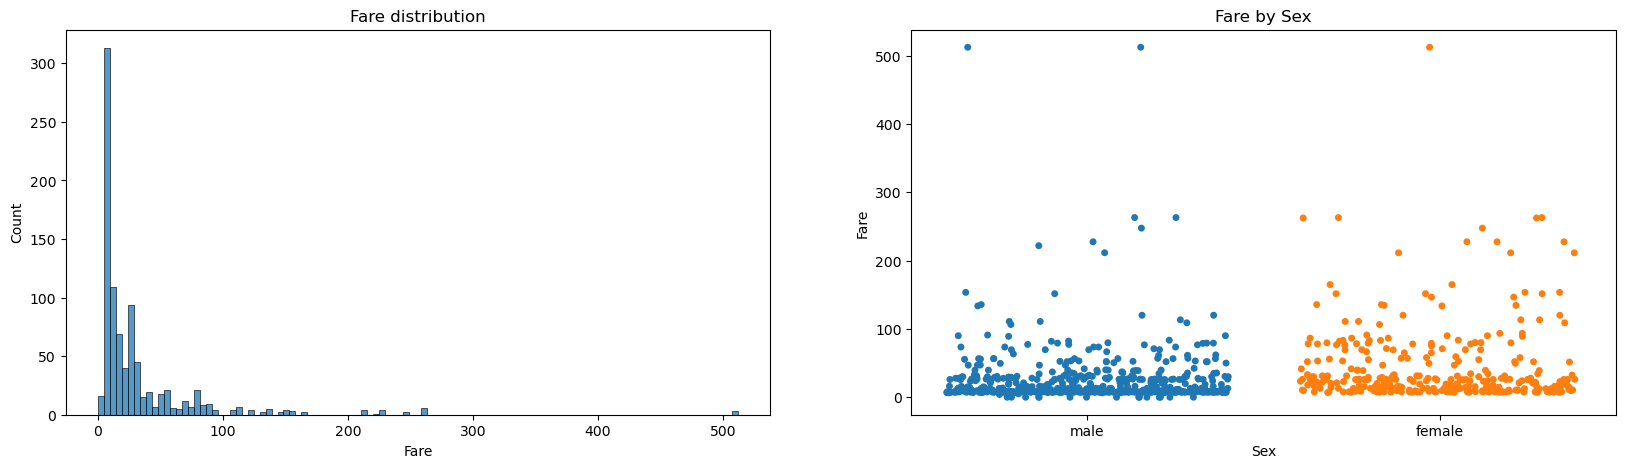

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.histplot(ax = axes[0], x = df["Fare"]).set_title('Fare distribution')
sns.stripplot(ax = axes[1], data = df, x="Sex", y="Fare", jitter=0.4).set_title('Fare by Sex');

Text(0.5, 1.0, 'Sex by Embarked')

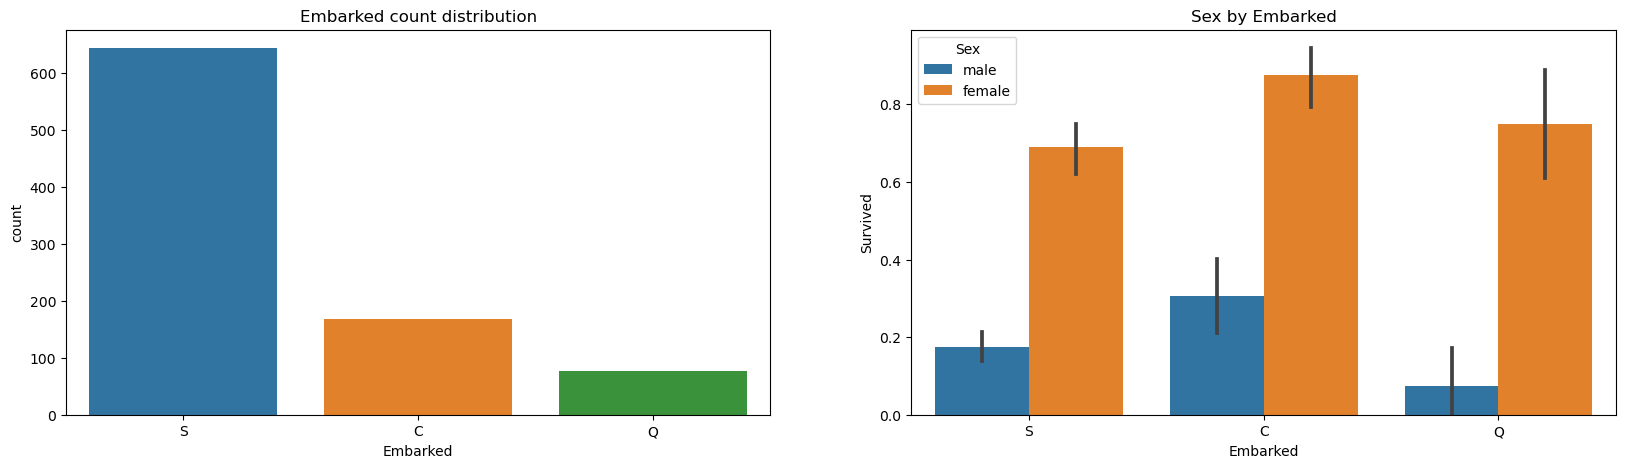

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
crosstable_joined_classdept = pd.crosstab(df['Embarked'], df['Pclass'])

sns.countplot(ax = axes[0], x = df['Embarked']).set_title('Embarked count distribution')
sns.barplot(ax = axes[1], data = df, x = "Embarked", y = "Survived", hue = "Sex").set_title('Sex by Embarked')

In [16]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [17]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
df["Embarked"] = df["Embarked"].fillna("S")

In [19]:
df["Embarked"].isnull().sum()

0

In [20]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [21]:
df = pd.get_dummies(df, columns = ["Embarked"], drop_first = True)

In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,0,0


In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_Q       0
Embarked_S       0
dtype: int64

In [24]:
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [25]:
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,1,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,0,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,0,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,0,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,0,0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,0,1
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,0,1
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,0,1


In [26]:
Adults = df[(df["Age"].isnull()) & (df['Parch'] == 0)]
Adults

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,1,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,0,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,0,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,0,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,0,0
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,0,0
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,0,0
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,0,1


In [27]:
number_of_adults = (df["Age"] >= 18).sum()
number_of_adults

601

In [28]:
age_of_adults = df[df["Age"] >= 18].Age.sum()
age_of_adults

20183.5

In [29]:
mean_adult = age_of_adults / number_of_adults

In [30]:
mean_adult

33.58319467554077

In [31]:
Adults_age = Adults["Age"]
Adults_age = Adults_age.fillna(mean_adult)
Adults_age

5      33.583195
17     33.583195
19     33.583195
26     33.583195
28     33.583195
         ...    
839    33.583195
849    33.583195
859    33.583195
868    33.583195
878    33.583195
Name: Age, Length: 157, dtype: float64

In [32]:
Kids = df[(df["Age"].isnull()) & (df['Parch'] != 0)]
Kids

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,0,0
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,0,0
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,0,0
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,0,1
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,0,1
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,0,1
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,0,1
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,0,1
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,0,1
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,0,1


In [33]:
number_of_kids = (df["Age"] < 18).sum()
number_of_kids

113

In [34]:
age_of_kids = df[df["Age"] < 18].Age.sum()
age_of_kids

1021.6700000000001

In [35]:
mean_kids = age_of_kids / number_of_kids

In [36]:
mean_kids

9.04132743362832

In [37]:
Kids = Kids["Age"]
Kids_age = Kids.fillna(mean_kids)
Kids_age

65     9.041327
128    9.041327
140    9.041327
159    9.041327
166    9.041327
176    9.041327
180    9.041327
201    9.041327
229    9.041327
324    9.041327
409    9.041327
485    9.041327
533    9.041327
593    9.041327
709    9.041327
783    9.041327
792    9.041327
846    9.041327
863    9.041327
888    9.041327
Name: Age, dtype: float64

In [38]:
Age_Filled = pd.concat([Kids_age, Adults_age], axis = 0)

In [39]:
Age_Filled

65      9.041327
128     9.041327
140     9.041327
159     9.041327
166     9.041327
         ...    
839    33.583195
849    33.583195
859    33.583195
868    33.583195
878    33.583195
Name: Age, Length: 177, dtype: float64

In [40]:
df["Age"] = df["Age"].fillna(Age_Filled)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,9.041327,1,2,W./C. 6607,23.4500,NaN,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,0,0


In [41]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_Q       0
Embarked_S       0
dtype: int64

In [42]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [43]:
df = df.drop("Cabin", axis = 1)

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,1


In [45]:
df[(df["Fare"]==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,0,1
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,0,1
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,0,1
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,33.583195,0,0,239853,0.0,0,1
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,0,1
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,33.583195,0,0,239853,0.0,0,1
466,467,0,2,"Campbell, Mr. William",male,33.583195,0,0,239853,0.0,0,1
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,33.583195,0,0,239854,0.0,0,1
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,0,1
633,634,0,1,"Parr, Mr. William Henry Marsh",male,33.583195,0,0,112052,0.0,0,1


In [46]:
df[(df["Ticket"]=="LINE")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,0,1
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,0,1
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,0,1
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,0,1


In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,1


In [48]:
arr = df["Fare"].unique()
arr.sort()
arr

array([  0.    ,   4.0125,   5.    ,   6.2375,   6.4375,   6.45  ,
         6.4958,   6.75  ,   6.8583,   6.95  ,   6.975 ,   7.0458,
         7.05  ,   7.0542,   7.125 ,   7.1417,   7.225 ,   7.2292,
         7.25  ,   7.3125,   7.4958,   7.5208,   7.55  ,   7.6292,
         7.65  ,   7.725 ,   7.7292,   7.7333,   7.7375,   7.7417,
         7.75  ,   7.775 ,   7.7875,   7.7958,   7.8   ,   7.8292,
         7.8542,   7.875 ,   7.8792,   7.8875,   7.8958,   7.925 ,
         8.0292,   8.05  ,   8.1125,   8.1375,   8.1583,   8.3   ,
         8.3625,   8.4042,   8.4333,   8.4583,   8.5167,   8.6542,
         8.6625,   8.6833,   8.7125,   8.85  ,   9.    ,   9.2167,
         9.225 ,   9.35  ,   9.475 ,   9.4833,   9.5   ,   9.5875,
         9.825 ,   9.8375,   9.8417,   9.8458,  10.1708,  10.4625,
        10.5   ,  10.5167,  11.1333,  11.2417,  11.5   ,  12.    ,
        12.275 ,  12.2875,  12.35  ,  12.475 ,  12.525 ,  12.65  ,
        12.875 ,  13.    ,  13.4167,  13.5   ,  13.7917,  13.8

In [49]:
list_Ticket = df["Ticket"].unique()
a = list_Ticket.tolist()
len(set(a))

681

In [50]:
df = df.drop("Ticket", axis = 1)

In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,1


In [52]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [53]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [54]:
df["Age"].unique()

array([22.        , 38.        , 26.        , 35.        , 33.58319468,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        ,  9.04132743,
       17.        , 32.        , 16.        , 25.        ,  0.83      ,
       30.        , 33.        , 23.        , 24.        , 46.        ,
       59.        , 71.        , 37.        , 47.        , 14.5       ,
       70.5       , 32.5       , 12.        ,  9.        , 36.5       ,
       51.        , 55.5       , 40.5       , 44.        ,  1.        ,
       61.        , 56.        , 50.        , 36.        , 45.5       ,
       20.5       , 62.        , 41.        , 52.        , 63.  

In [55]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [56]:
df["Sex"] = df["Sex"].replace("male", 0)
df["Sex"] = df["Sex"].replace("female", 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,1


In [57]:
df["Sex"].unique()

array([0, 1], dtype=int64)

In [58]:
df = df.drop("Name", axis = 1)

In [59]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,1
1,2,1,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,1


In [60]:
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [61]:
df["Survived"].unique()

array([0, 1], dtype=int64)

In [62]:
df = df.drop("PassengerId", axis = 1)

In [63]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 50.6 KB


In [65]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64

<AxesSubplot:>

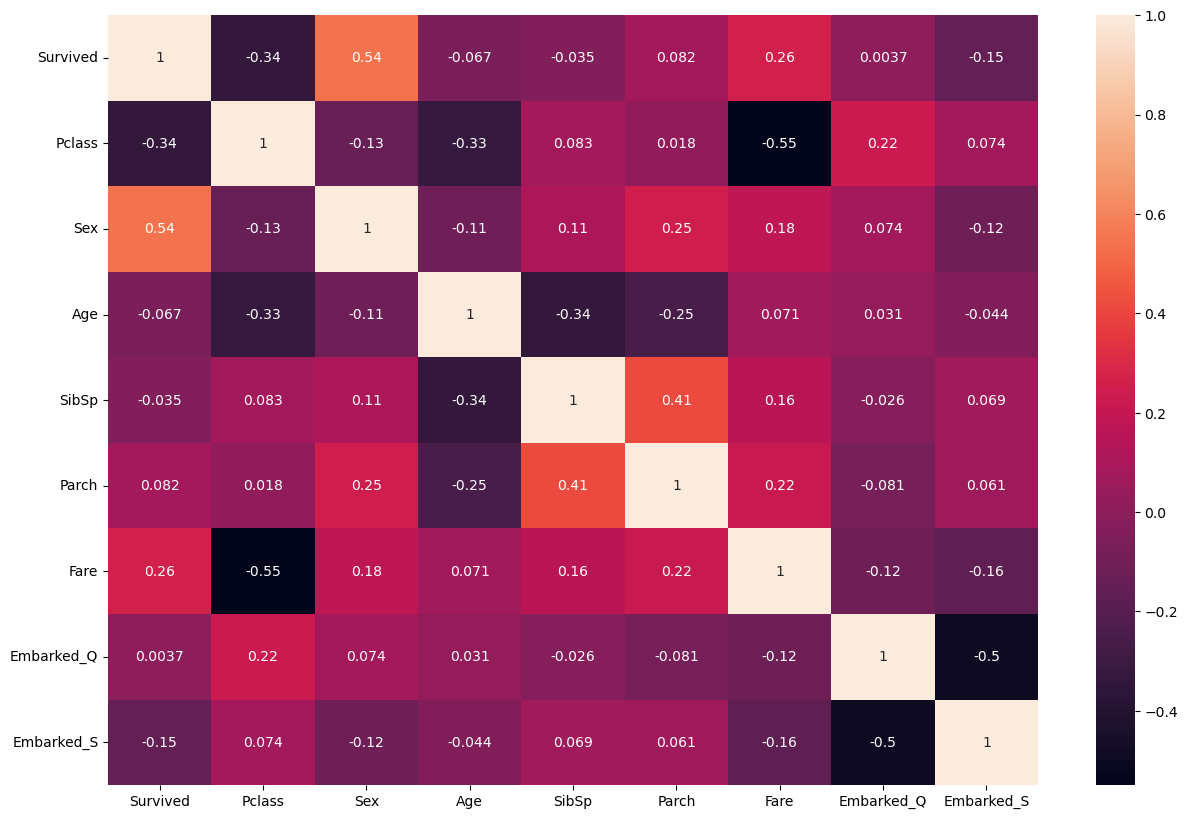

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)

In [67]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Sex,891.0,0.352413,0.477990,0.00,0.0000,0.0000,1.0,1.0000
Age,891.0,29.919818,13.463084,0.42,21.0000,31.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Embarked_Q,891.0,0.086420,0.281141,0.00,0.0000,0.0000,0.0,1.0000
Embarked_S,891.0,0.725028,0.446751,0.00,0.0000,1.0000,1.0,1.0000


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X = df.drop("Sex", axis = 1)

In [70]:
y = df["Sex"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
model = DecisionTreeClassifier()

In [74]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
pred = model.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [77]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       167
           1       0.66      0.53      0.59       101

    accuracy                           0.72       268
   macro avg       0.70      0.68      0.69       268
weighted avg       0.71      0.72      0.71       268



C:\Users\blizk\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


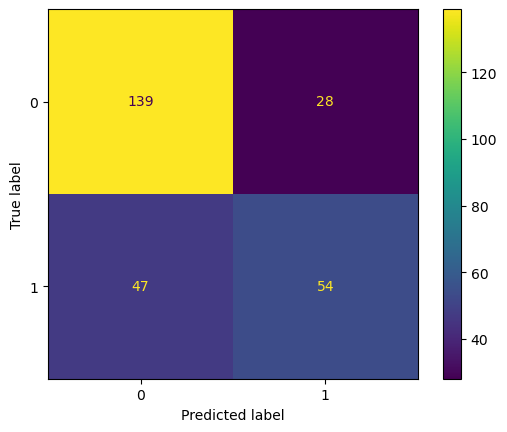

In [78]:
plot_confusion_matrix(model, X_test, y_test)

In [79]:
pd.DataFrame(index = X.columns, data = model.feature_importances_, columns = ["Importances"]).sort_values("Importances")

,Importances
Embarked_Q,0.012935
Embarked_S,0.021869
Pclass,0.030003
SibSp,0.036832
Parch,0.076655
Age,0.206195
Survived,0.304711
Fare,0.310801


In [81]:
from sklearn.tree import plot_tree

def report_model(model): 
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    # plt.figure(figsize=(10,8), dpi=200)
    # plot_tree(model, feature_names=X.columns, filled=True)

In [82]:
#tree_4 = DecisionTreeClassifier(max_depth=4)
#tree_3 = DecisionTreeClassifier(max_depth=3)
#tree_2 = DecisionTreeClassifier(max_depth=2)

In [83]:
#tree_4.fit(X_train, y_train)

In [84]:
#tree_3.fit(X_train, y_train)

In [85]:
#tree_2.fit(X_train, y_train)

In [86]:
# 79 %

# report_model(tree_4)

In [87]:
# 78 %

# report_model(tree_3)

In [88]:
# 79 %

# report_model(tree_2)

In [90]:
#max_leaf_tree_2 = DecisionTreeClassifier(max_leaf_nodes=2)
#max_leaf_tree_3 = DecisionTreeClassifier(max_leaf_nodes=3)
#max_leaf_tree_4 = DecisionTreeClassifier(max_leaf_nodes=4)
#max_leaf_tree_5 = DecisionTreeClassifier(max_leaf_nodes=5)

In [91]:
#max_leaf_tree_2.fit(X_train, y_train)

In [92]:
#max_leaf_tree_3.fit(X_train, y_train)

In [93]:
#max_leaf_tree_4.fit(X_train, y_train)

In [94]:
#max_leaf_tree_5.fit(X_train, y_train)

In [95]:
# 79 %

#report_model(max_leaf_tree_2)

In [96]:
# 79 % 

#report_model(max_leaf_tree_3)

In [97]:
# 79 % 

#report_model(max_leaf_tree_4)

In [98]:
# 79 % 

#report_model(max_leaf_tree_5)

In [99]:
FINAL_model_DT = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2)

In [100]:
FINAL_model_DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2)

In [101]:
report_model(FINAL_model_DT)

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       167
           1       0.70      0.77      0.74       101

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.80      0.79      0.79       268



In [102]:
X = df.drop("Sex", axis = 1).values
y = df["Sex"].values

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
scaler = StandardScaler()

In [106]:
X_train = scaler.fit_transform(X_train)

In [107]:
X_test = scaler.transform(X_test)

In [114]:
from sklearn.metrics import confusion_matrix

In [123]:
from sklearn.metrics import confusion_matrix

In [128]:
from tensorflow.keras.models import Sequential

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [127]:
model = Sequential()

model.add(Dense(8, activation = "relu"))

model.add(Dense(4, activation = "relu"))

model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")

NameError: name 'Sequential' is not defined

In [ ]:
model.fit(x = X_train, y = y_train, epochs = 100, validation_data = (X_test, y_test))

In [110]:
loss = pd.DataFrame(model.history)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'history'

<AxesSubplot:>

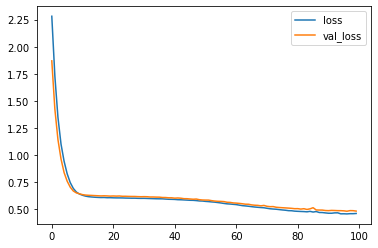

In [113]:
loss.plot()

In [114]:
predictions = model.predict(X_test).astype("int32")  

9/9 [==============================] - 0s 1ms/step


In [115]:
# Přesnost modelu je 62 % a predikuje mi pouze positive a false positive. Zkusím ho ještě vylepšit změnou parametrů. 

print(classification_report(y_test, predictions))

confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       167
           1       0.00      0.00      0.00       101

    accuracy                           0.62       268
   macro avg       0.31      0.50      0.38       268
weighted avg       0.39      0.62      0.48       268



c:\users\blizk\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\blizk\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\blizk\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

array([[167,   0],
       [101,   0]], dtype=int64)

In [116]:
#X = df.drop("Sex", axis = 1).values
#y = df["Sex"].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


In [117]:
model = Sequential()

model.add(Dense(units = 7, activation = 'softplus'))
model.add(Dense(1, activation = 'softplus'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ["accuracy"])

model.fit(X_train, y_train, validation_split = 0.1, batch_size = 8, epochs = 50)

Epoch 1/50
70/70 [==============================] - 1s 4ms/step - loss: 3.0728 - accuracy: 0.6500 - val_loss: 1.7174 - val_accuracy: 0.7302
Epoch 2/50
70/70 [==============================] - 0s 2ms/step - loss: 1.3151 - accuracy: 0.6446 - val_loss: 0.9911 - val_accuracy: 0.6984
Epoch 3/50
70/70 [==============================] - 0s 2ms/step - loss: 1.0070 - accuracy: 0.6589 - val_loss: 0.9863 - val_accuracy: 0.7460
Epoch 4/50
70/70 [==============================] - 0s 2ms/step - loss: 0.9244 - accuracy: 0.6554 - val_loss: 1.0200 - val_accuracy: 0.6984
Epoch 5/50
70/70 [==============================] - 0s 2ms/step - loss: 0.8843 - accuracy: 0.6554 - val_loss: 0.8371 - val_accuracy: 0.6984
Epoch 6/50
70/70 [==============================] - 0s 2ms/step - loss: 0.8161 - accuracy: 0.6714 - val_loss: 1.0167 - val_accuracy: 0.6984
Epoch 7/50
70/70 [==============================] - 0s 2ms/step - loss: 0.7874 - accuracy: 0.6661 - val_loss: 0.7763 - val_accuracy: 0.7143
Epoch 8/50
70/70 [==

In [118]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

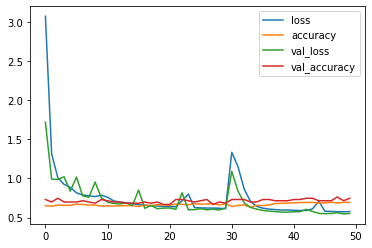

In [119]:
model_loss.plot()

In [120]:
predictions = model.predict(X_test).astype("int32") 

9/9 [==============================] - 0s 1ms/step


In [121]:
# Přesnost modelu je 64 % a mám ještě "funny" confusion matrix, což indikuje, že je to blbě, takže tady končím. Víc bohužel 
# nebylo v mých silách a síť mi nešla natrénovat lépe. Zkoušela jsem měnit parametry modelu - early stop, dropout, počet vrstev, 
# metriky, aktivační funkce atd. Bohužel bez většího výsledků. Zkoušela jsem s použitím scaleru i bez něho. Bez výsledku. 
# Zkoušela jsem taky upravit a použít scaler na kolonky Fare a Age, protože nebyly normalizované, ale bohužel mi to nešlo 
# a házelo mi to error. Nad tímto jsem strávila spoustu času a už není v mých silách tomu věnovat času více. Bohužel mi 
# tady NN nefungovala tak, jak bych si přála. Ačkoli si pamatuju nápovědu, ze nemám podcenit feature engineering, 
# tak bohužel nevidím prostor, kde vše zlepšit.  

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       167
           1       0.00      0.00      0.00       101

    accuracy                           0.62       268
   macro avg       0.31      0.50      0.38       268
weighted avg       0.39      0.62      0.48       268



c:\users\blizk\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\blizk\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\blizk\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [122]:
confusion_matrix(y_test, predictions)

array([[167,   0],
       [101,   0]], dtype=int64)